In [46]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
from os.path import join

#function to add contrast to the image, returns image with better contrast
def add_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a,b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def read_image(image):
    img = cv2.imread(image)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return RGB_img

def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

def resize_image(image, size=(800,800)):
    return cv2.resize(image, size)

def blur_image(image):
    return cv2.GaussianBlur(image, (11, 11), 0)

def combine(image, contrast=True, resize=True, blur=False):
    if contrast:
        img = add_contrast(image)
    if resize:
        img = resize_image(img)
    if blur:
        img = blur_image(img)

    return img

def gray_image(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def convert_color(image, toRGB=True):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def thresh_image(image, threshold=185):
    return cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)[1]

def save_image(directory, image, name):
    path = join(directory, '{0}'.format(name)+'.jpg')
    cv2.imwrite(path, image)
    
def grab_contours_and_sort_by_area(image, threshold=185, all=False):
    
    image_grayed = gray_image(image)
    image_threshed = thresh_image(image_grayed, threshold=threshold)
    
    if all:
        contours = cv2.findContours(image_threshed.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    else: 
        contours = cv2.findContours(image_threshed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    contours = imutils.grab_contours(contours)
    
    return sorted(contours, key=cv2.contourArea, reverse=True)

def draw_contour(image, contour):
    contour_image = cv2.drawContours(image, contour, -1, (255,0,0), 3)
    
    return contour_image

def add_images(image1, image2, hor=True):
    if hor:
        img = np.concatenate((image1, image2), axis=1)
    else:
        img = np.concatenate((image1, image2), axis=0)
    return img

def create_prediction_folders(number):
    folder = 'test/predict{0}'.format(number)
    if not isdir(folder):
        makedirs(folder)
        makedirs('{0}/predict'.format(folder))
    return folder

In [7]:
imgname = 'test5.jpg'

In [8]:
img = read_image(imgname)

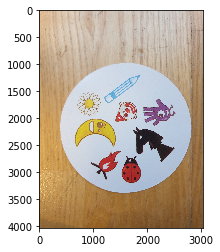

In [9]:
display_image(img)

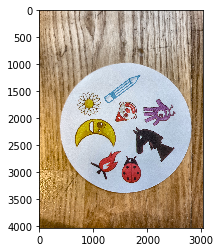

In [10]:
img_contrasted = add_contrast(img)
display_image(img_contrasted)

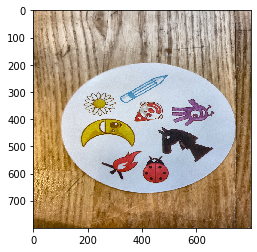

In [20]:
img_contrasted_resized = resize_image(img_contrasted)
display_image(img_contrasted_resized)

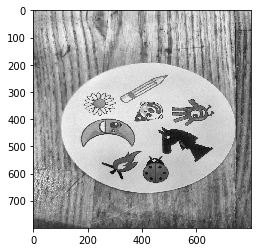

In [21]:
img_contrasted_resized_grayed = gray_image(img_contrasted_resized)
display_image(img_contrasted_resized_grayed)

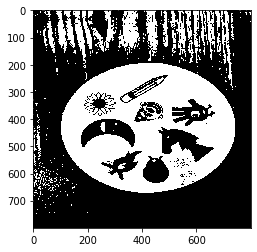

In [22]:
img_contrasted_resized_grayed_threshed = thresh_image(img_contrasted_resized_grayed)
display_image(img_contrasted_resized_grayed_threshed)

In [47]:
contours = grab_contours_and_sort_by_area(img_contrasted_resized)

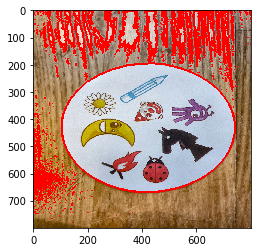

In [48]:
img_with_contours = draw_contour(img_contrasted_resized, contours)
display_image(img_with_contours)

In [49]:
biggest_contour = contours[0]

In [52]:
# create mask with the biggest contour
mask = np.zeros(img_contrasted_resized_grayed.shape,np.uint8)
mask = cv2.drawContours(mask, [biggest_contour], -1, 255, cv2.FILLED)

In [53]:
# card in foreground
fg_masked = cv2.bitwise_and(img_contrasted_resized, img_contrasted_resized, mask=mask)

In [55]:
# white background (use inverted mask)
mask = cv2.bitwise_not(mask)
bk = np.full(img_contrasted_resized_grayed.shape, 255, dtype=np.uint8)
bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

In [56]:
# combine back- and foreground
final = cv2.bitwise_or(fg_masked, bk_masked)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:234: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'
